<a href="https://colab.research.google.com/github/sahanabikki/weather_classification/blob/main/DenseNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv /content/new_kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset
License(s): CC0-1.0


In [ ]:
!unzip multiclass-weather-dataset.zip -d weather_data

Archive:  multiclass-weather-dataset.zip
  inflating: weather_data/dataset/alien_test/Cloud_1.png  
  inflating: weather_data/dataset/alien_test/Cloud_2.jpg  
  inflating: weather_data/dataset/alien_test/Cloud_3.jpeg  
  inflating: weather_data/dataset/alien_test/Cloud_4.jpg  
  inflating: weather_data/dataset/alien_test/foggy_1.jpg  
  inflating: weather_data/dataset/alien_test/foggy_10.jpg  
  inflating: weather_data/dataset/alien_test/foggy_2.jpg  
  inflating: weather_data/dataset/alien_test/foggy_3.jpg  
  inflating: weather_data/dataset/alien_test/foggy_4.jpg  
  inflating: weather_data/dataset/alien_test/foggy_5.jpg  
  inflating: weather_data/dataset/alien_test/foggy_6.jpg  
  inflating: weather_data/dataset/alien_test/foggy_7.jpg  
  inflating: weather_data/dataset/alien_test/foggy_8.jpg  
  inflating: weather_data/dataset/alien_test/foggy_9.jpg  
  inflating: weather_data/dataset/alien_test/rain_1.jpg  
  inflating: weather_data/dataset/alien_test/rain_2.png  
  inflating: we

In [ ]:
!unzip "/content/compressed_alien_test.zip" -d /content/next_new_testing/

Archive:  /content/compressed_alien_test.zip
   creating: /content/next_new_testing/sunrise/
  inflating: /content/next_new_testing/sunrise/sunrise_1.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_2.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_3.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_4.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_5.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_6.jpg  
  inflating: /content/next_new_testing/sunrise/sunrise_7.jpg  
   creating: /content/next_new_testing/shiny/
  inflating: /content/next_new_testing/shiny/shine_1.jpg  
  inflating: /content/next_new_testing/shiny/shine_2.jpg  
  inflating: /content/next_new_testing/shiny/shine_3.jpg  
   creating: /content/next_new_testing/rainy/
  inflating: /content/next_new_testing/rainy/rain_1.jpg  
  inflating: /content/next_new_testing/rainy/rain_2.png  
  inflating: /content/next_new_testing/rainy/rain_3.jpg  
  inflating: /content/n

In [ ]:
!unzip "/content/training dataset.zip" -d /content/training_data/

Archive:  /content/training dataset.zip
  inflating: /content/training_data/test.csv  
   creating: /content/training_data/sunrise/
  inflating: /content/training_data/sunrise/sunrise1.jpg  
  inflating: /content/training_data/sunrise/sunrise10.jpg  
  inflating: /content/training_data/sunrise/sunrise100.jpg  
  inflating: /content/training_data/sunrise/sunrise101.jpg  
  inflating: /content/training_data/sunrise/sunrise102.jpg  
  inflating: /content/training_data/sunrise/sunrise103.jpg  
  inflating: /content/training_data/sunrise/sunrise104.jpg  
  inflating: /content/training_data/sunrise/sunrise105.jpg  
  inflating: /content/training_data/sunrise/sunrise106.jpg  
  inflating: /content/training_data/sunrise/sunrise107.jpg  
  inflating: /content/training_data/sunrise/sunrise108.jpg  
  inflating: /content/training_data/sunrise/sunrise109.jpg  
  inflating: /content/training_data/sunrise/sunrise11.jpg  
  inflating: /content/training_data/sunrise/sunrise110.jpg  
  inflating: /cont

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.3, brightness_range=[0.8,1.2],
    horizontal_flip=True,fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    r"/content/training_data", target_size=(224, 224), batch_size=16, class_mode='categorical'
)

test = test_datagen.flow_from_directory(
    r"/content/next_new_testing", target_size=(224, 224), batch_size=16, class_mode='categorical'
)

print(train.class_indices)

Found 1500 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}


In [ ]:
conv_base = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
conv_base.trainable = False  # Freeze base layers
model = Sequential([
    conv_base,Flatten(),
    Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),Dropout(0.5),  Dense(256, activation="relu", kernel_regularizer=l2(0.01)),  BatchNormalization(),
    Dropout(0.5), Dense(5, activation="softmax")
])
model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,863,813 (125.37 MB)

 Trainable params: 25,824,773 (98.51 MB)

 Non-trainable params: 7,039,040 (26.85 MB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(train, epochs=10, validation_data=test, callbacks=[early_stopping, reduce_lr])

# Evaluate Model
loss, accuracy = model.evaluate(test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 353s 4s/step - accuracy: 0.6112 - loss: 11.7443 - val_accuracy: 0.8000 - val_loss: 7.7729 - learning_rate: 0.0010
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.8050 - loss: 7.1073 - val_accuracy: 0.9000 - val_loss: 5.4858 - learning_rate: 0.0010
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.8169 - loss: 5.6416 - val_accuracy: 0.8000 - val_loss: 4.7718 - learning_rate: 0.0010
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.8248 - loss: 4.8157 - val_accuracy: 0.9333 - val_loss: 4.1100 - learning_rate: 0.0010
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.8556 - loss: 4.3341 - val_accuracy: 0.8667 - val_loss: 3.9474 - learning_rate: 0.0010
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 0.8652 - loss: 3.9242 - val_accuracy: 0.8000 - val_loss: 3.9693 - learning_rate: 0.0010
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.8753 - loss: 3.6497 - val_ac

In [ ]:
model.save("weather_densenet.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

model = tf.keras.models.load_model(r"weather_densenet.h5", compile=False)

In [ ]:
img = image.load_img(r"/content/next_new_testing/sunrise/sunrise_3.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

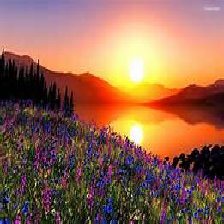

In [ ]:
img

In [ ]:
pred = model.predict(x)
index = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
result = index[pred.argmax()]
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
sunrise
